# IRIS FLOWER PREDICTION

# Visual Understanding of Iris Species

Before diving into numerical features, it is helpful to visually understand the differences between Iris species.

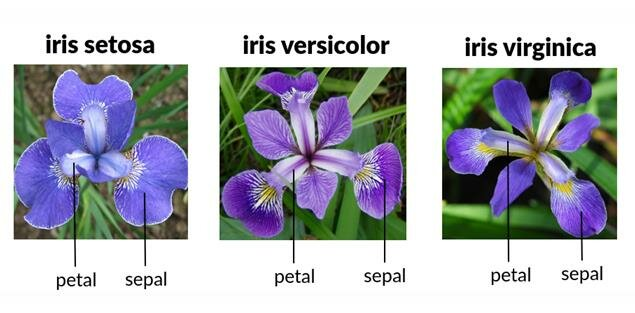

These images provide the morphological differences between Iris species.

Although classification is performed using numerical features,visual inspection helps build intuition about species differences.

# Problem Statement

The goal of this notebook is to predict the species of an Iris flower (Setosa, Versicolor, or Virginica) based on four physical measurements:
- Sepal length
- Sepal width
- Petal length
- Petal width

Rather than focusing solely on accuracy, this notebook emphasizes:
- Understanding the dataset
- Visualizing class separability
- Comparing multiple machine learning models
- Interpreting model decisions

# Objective

Assume that we have the measurements of the iris flower according to their species and task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset into dataframe(df)

In [ ]:
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

# Exploratory Data Analysis

## 1. Dataset Overview

In [ ]:
df.head()  #head views the first five rows of the dataframe

The Iris dataset consists of 150 observations with four numerical features describing flower morphology. The target variable represents three species of Iris flowers, with each class having an equal number of samples.

## 2. Attribute Information

Id - represents Id number in int datatype for each record <br>
SepalLengthCm - Length of Sepal in centimeter in float datatype <br>
SepalWidthCm - Width of Sepal in centimeter in float datatype <br>
PetalLengthCm - Length of Petal in centimeter in float datatype <br>
PetalWidthCm - Width of Petal in centimeter in float datatype <br>
Species - Species of Iris flower (Setosa, Versicolor,Virginica) 

This dataset contains 150 instances in which each species has 50 instances.

In [ ]:
df.shape    #shape returns a vector that shows the number of rows and columns

In [ ]:
df.info()   #info gives a summary of all the no. of rows and columns,column names in the dataset, count of non-null values,
            #their datatypes, memory usage (summary of the dataframe)

In [ ]:
df.isnull().sum()     # exact number of missing values(null values) per column

In [ ]:
df.describe()    #statistical summary of data

In [ ]:
species_counts=df["species"].value_counts()
species_counts

In [ ]:
plt.figure(figsize=(2, 2))
plt.pie(
    species_counts,
    labels=species_counts.index,
    autopct='%1.1f%%',        # Show percentages
    startangle=140,           # Rotate the chart
    colors=plt.cm.Pastel1.colors,  # Use pastel colormap
    wedgeprops={'edgecolor': 'black'}  # Add edge to slices
)

### Inference: <br> Each species have equal samples of species. <br> The dataset is clean, well-balanced, and contains no missing values,making it suitable for benchmarking classification algorithms.

EDA is used to explore and analyse data with the help of data visualisation tools to identify the trends, patterns,relationships,correlations, outliers.

Step1: Convert the categorical variable (Species) into numerical variable<br> Step 2: Numerical variables generate histograms, box plots to visualize distribution, shape, spread and potential outliers. <br> Step 3: To find relationships between variables use scatter plots, correlation matrices

Histograms- use bar plots to illustrate the distribution of numerical data <br> Box plots - shows min value, max value, median, skewness <br> Scatter plots - to find the relationship <br> Correlation heatmap - shows how each of the variables in a dataset are correlated.

## 3. Converting Categorical Value to Numerical value 

In [ ]:
#Converting categorical variable into numerical form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
df["species"]

## 4. Class Distribution

In [ ]:
sns.countplot(x='species', data=df)
plt.title("Class Distribution")
plt.show()

### Inference: <br> 
Each Iris species contains exactly 50 samples, indicating a perfectly balanced dataset. This balance ensures that model performance metrics are not biased toward any particular class.<br> Balanced data → accuracy is meaningful.

## 5. Pairplot Analysis

In [ ]:
sns.pairplot(df,hue='species',diag_kind='kde')
plt.show()

### Inference: <br>
The pairwise feature plots reveal clear separation of the Setosa class, particularly along petal length and petal width dimensions.

In contrast, Versicolor and Virginica exhibit overlapping feature spaces, suggesting that these two classes may be more challenging to distinguish using linear decision boundaries.

## 6. Feature wise Distribution (Histogram)

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
axes[0,0].hist(df['sepal_length'],color='mistyrose',edgecolor='black')
axes[0, 0].set_title('Sepal Length')
axes[0,1].hist(df['sepal_width'],color='peachpuff',edgecolor='black')
axes[0, 1].set_title('Sepal Width')
axes[1,0].hist(df['petal_length'],color='palegoldenrod',edgecolor='black')
axes[1, 0].set_title('Petal Length')
axes[1,1].hist(df['petal_width'],color='azure',edgecolor='black')
axes[1,1].set_title('Petal Width')
plt.tight_layout()
plt.show()

### Inference: <br>
These histograms provide an overview of the overall distribution and scale of each feature before class-wise analysis.

## 7. Species-wise distribution 

In [ ]:
species = df['species'].unique()

fig, axes = plt.subplots(2,2, figsize=(16,8))

for sp in species:
    axes[0,0].hist(df[df['species']==sp]['sepal_length'], alpha=0.5, label=sp)
axes[0,0].set_title('Sepal Length')
axes[0,0].legend()

for sp in species:
    axes[0,1].hist(df[df['species']==sp]['sepal_width'], alpha=0.5, label=sp)
axes[0,1].set_title('Sepal Width')

for sp in species:
    axes[1,0].hist(df[df['species']==sp]['petal_length'], alpha=0.5, label=sp)
axes[1,0].set_title('Petal Length')

for sp in species:
    axes[1,1].hist(df[df['species']==sp]['petal_width'], alpha=0.5, label=sp)
axes[1,1].set_title('Petal Width')

plt.tight_layout()
plt.show()


### Inference: <br> 
Petal-related features show distinct distribution patterns across species,indicating strong discriminatory power. Sepal features, particularly sepal width, exhibit greater overlap and are therefore less informative.

## 8. Boxplot of each features with respect to species

In [ ]:
fig,axes = plt.subplots(4, 1, figsize=(8,16))  # 4 rows, 1 column

sns.boxplot(x='species', y='sepal_length', data=df, ax=axes[0])
sns.stripplot(x='species', y='sepal_length', data=df, color='black', jitter=True,ax=axes[0])
axes[0].set_title('Sepal Length by Species')

sns.boxplot(x='species', y='petal_length', data=df, ax=axes[1])
sns.stripplot(x='species', y='petal_length', data=df, color='black', jitter=True,ax=axes[1])
axes[1].set_title('Petal Length by Species')

sns.boxplot(x='species', y='sepal_width', data=df, ax=axes[2])
sns.stripplot(x='species', y='sepal_width', data=df, color='black', jitter=True,ax=axes[2])
axes[2].set_title('Sepal Width by Species')

sns.boxplot(x='species', y='petal_width', data=df, ax=axes[3])
sns.stripplot(x='species', y='petal_width', data=df, color='black', jitter=True,ax=axes[3])
axes[3].set_title('Petal Width by Species')

plt.tight_layout()
plt.show()

## 9. Groupby/describe

In [ ]:
df.groupby('species').mean()

### Inference: <br> 
By computing the mean of each feature per species:

- Petal length and petal width show clear separation between species.  
- Sepal length shows moderate differences.  
- Sepal width shows minimal differences, confirming it is less informative for classification.

These statistics complement the visual analysis and justify feature selection.

## 10. Correlation Analysis

Correlation is a statistical measure that indicates the strength and direction of
the relationship between two variables.

- **Positive correlation:** When one variable increases, the other tends to increase.  
  *Example:* Height and weight.

- **Negative correlation:** When one variable increases, the other tends to decrease.  
  *Example:* Exercise and body fat.

- **Zero correlation:** No apparent relationship between the variables.

A **heatmap** is a visual representation of a matrix using colors to indicate values.
In the context of correlation:

- The heatmap displays the correlation coefficients between features.  
- Stronger correlations are shown with more intense colors (darker or brighter depending on the color map).
- This helps quickly identify which features are strongly related and which are independent.

In [ ]:
#Compute Correlation Matrix
corr_matrix = df.corr()
corr_matrix

### Inference: <br>
This computes Pearson correlation coefficients between all numerical features.

Values range from -1 to 1

- 1 → perfect positive correlation

- -1 → perfect negative correlation

- 0 → no linear correlation

In [ ]:
#Plot the heatmap
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.index)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

| Parameter                             | Explanation                                  |
| ------------------------------------- | -------------------------------------------- |
| `annot=True`                          | Shows correlation numbers on the heatmap     |
| `cmap='coolwarm'`                     | Blue = negative, Red = positive correlations |
| `fmt=".2f"`                           | Formats numbers to 2 decimal places          |
| `square=True`                         | Makes each cell square-shaped                |
| `xticklabels`, `yticklabels`          | Ensures labels match the features            |
| `plt.xticks(rotation=45, ha='right')` | Rotates x-axis labels for readability        |
| `plt.yticks(rotation=0)`              | Keeps y-axis labels horizontal               |
| `plt.tight_layout()`                  | Prevents labels from overlapping             |


In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)

Only shows one half of the symmetric correlation matrix.

### Inference : <br>
From the heatmap, we observe:

- **Petal length and petal width** are strongly positively correlated (~0.96),  
  suggesting redundancy but also strong predictive power.
  - Very close to 1 → strong positive correlation
  - Means: when petal length is bigger, petal width is also bigger
  - Intuition: flowers with long petals also have wide petals
  - Implication: models might rely on either feature since they give similar info
- **Sepal length and sepal width** are weakly correlated (~0.12),  
  indicating less discriminatory usefulness.
  - Close to 0 → very weak correlation
  - Means: no strong pattern; long sepals don’t necessarily have wide sepals
  - Implication: less predictive, not very useful for classification
    
- Petal dimensions are strong features for distinguishing species.<br> Sepal dimensions are weaker features


## EDA Insights: <br>
- The dataset is clean and well-balanced.
- Setosa is easily separable based on petal features.
- Versicolor and Virginica show overlapping feature distributions.
- Petal length and petal width are the most informative features.

These insights inform both model selection and interpretation strategies.

# Train - Test Split & Scaling

Importance of Scaling:
Distance-based models such as KNN and SVM are sensitive to feature scale, therefore standardization is applied.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## Model 1 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1=model1.predict(X_test)

## Model 2 - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
y_pred_model2=model2.predict(X_test)

## Model 3 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred_model3=model3.predict(X_test)

## Model 4 - SVM

In [ ]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(X_train,y_train)
y_pred_model4=model4.predict(X_test)

## Model 5 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model5=RandomForestClassifier()
model5.fit(X_train,y_train)
y_pred_model5=model5.predict(X_test)

## Model 6 - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model6=GaussianNB()
model6.fit(X_train,y_train)
y_pred_model6=model6.predict(X_test)

## Model 7 - Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model7=GradientBoostingClassifier()
model7.fit(X_train,y_train)
y_pred_model7=model7.predict(X_test)

## Model 8 - XG Boost

In [ ]:
!pip install xgboost

from xgboost import XGBClassifier

model8=XGBClassifier()
model8.fit(X_train,y_train)
y_pred_model8=model8.predict(X_test)

# Model Evaluation

## Model 1-Logistic Regression

In [ ]:
print('Accuracy of Logistic Regression:',accuracy_score(y_test,y_pred_model1)*100)
print(confusion_matrix(y_test,y_pred_model1))
print(classification_report(y_test,y_pred_model1))
train_acc=model1.score(X_train,y_train)
test_acc=model1.score(X_test,y_test)

print(f"Train accuracy:{train_acc}")
print(f"Test accuracy:{test_acc}")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Inference: <br>

- **Accuracy:** 93.3% on the test set  
- **Confusion Matrix:**
  - Setosa: all 10 correctly classified  
  - Versicolor: 9 correctly classified, 1 misclassified as Virginica  
  - Virginica: 9 correctly classified, 1 misclassified as Versicolor  

- **Inference:** Logistic Regression performs very well on the Iris dataset due to approximate linear separability.  
  Misclassifications occur between Versicolor and Virginica, which overlap slightly in feature space.

## Model 2- KNN

In [ ]:
print("Accuracy (KNN):",accuracy_score(y_test,y_pred_model2)*100)
print(confusion_matrix(y_test,y_pred_model2))
print(classification_report(y_test,y_pred_model2))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, cmap='Greens')
plt.title('KNN Confusion Matrix')
plt.show()

### Inference:<br>
- **Accuracy:** 93.33%
- **Confusion Matrix:**
  - Setosa: all 10 correctly classified  
  - Versicolor: all 10 correctly classified  
  - Virginica: 8 correctly classified, 2 misclassified as Versicolor  

- **Inference:** KNN performs very well on the Iris dataset due to distinct distances between classes.  
  The slight misclassification in Virginica occurs because it overlaps slightly with Versicolor in feature space.


## Model 3-Decision Tree

In [ ]:
print("Accuracy(DecisionTree):",accuracy_score(y_test,y_pred_model3)*100)
print(confusion_matrix(y_test,y_pred_model3))
print(classification_report(y_test,y_pred_model3))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model3, X_test, y_test, cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Inference: <br>

- **Accuracy:** 90% on the test set  
- **Confusion Matrix:**
  - Setosa: 10 correctly classified  
  - Versicolor: 9 correctly classified, 1 misclassified as Virginica  
  - Virginica: 8 correctly classified, 1 misclassified as Versicolor  

- **Inference:** Decision Tree performs well for the Iris dataset.  
  Setosa is easily separable due to its distinct feature values.  
  Misclassifications occur between Versicolor and Virginica, reflecting their overlapping feature distributions.

## Model 4-SVM

In [ ]:
print("Accuracy(SVM):",accuracy_score(y_test,y_pred_model4)*100)
print(confusion_matrix(y_test,y_pred_model4))
print(classification_report(y_test,y_pred_model4))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model4, X_test, y_test, cmap='Purples')
plt.title('SVM Confusion Matrix')
plt.show()

### Inference: <br>

- **Accuracy:** 96.7% on the test set  
- **Confusion Matrix:**
  - Setosa: 10 correctly classified  
  - Versicolor: 9 correctly classified, 1 misclassified as Virginica  
  - Virginica: 10 correctly classified  

- **Inference:** SVM performs very well on the Iris dataset.  
  Setosa is easily separable from the other two classes, while slight overlap between Versicolor and Virginica causes one misclassification.  
  Overall, SVM captures class boundaries effectively using a linear/non-linear kernel.


## Model 5- Random Forest

In [ ]:
print("Accuracy(RF):",accuracy_score(y_test,y_pred_model5)*100)
print(confusion_matrix(y_test,y_pred_model5))
print(classification_report(y_test,y_pred_model5))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model5, X_test, y_test, cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

### Inference:<br>
- **Accuracy:** 93.3% on the test set  
- **Confusion Matrix:**
  - Setosa: 10 correctly classified  
  - Versicolor: 9 correctly classified, 1 misclassified as Virginica  
  - Virginica: 9 correctly classified, 1 misclassified as Versicolor  

- **Inference:** Random Forest performs very well for the Iris dataset.  
  Setosa is easily separable due to distinct feature values.  
  Misclassifications occur between Versicolor and Virginica because of feature overlap.  
  Overall, the ensemble method captures class boundaries effectively.


## Model 6-Naive Bayes

In [ ]:
print("Accuracy(NB):",accuracy_score(y_test,y_pred_model6)*100)
print(confusion_matrix(y_test,y_pred_model6))
print(classification_report(y_test,y_pred_model6))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model6, X_test, y_test, cmap='Oranges')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Inference: <br>
- **Accuracy:** 96.7% on the test set  
- **Confusion Matrix:**
  - Setosa: 10 correctly classified  
  - Versicolor: 9 correctly classified, 1 misclassified as Virginica  
  - Virginica: 10 correctly classified  

- **Inference:** Naive Bayes performs very well on the Iris dataset.  
  Setosa is easily separable, while the slight overlap between Versicolor and Virginica causes one misclassification.  
  Overall, the probabilistic model captures class boundaries effectively.

## Model 7-Gradient Boosting

In [ ]:
print("Accuracy(GB):",accuracy_score(y_test,y_pred_model7)*100)
print(confusion_matrix(y_test,y_pred_model7))
print(classification_report(y_test,y_pred_model7))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model7, X_test, y_test, cmap='Purples')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

### Inference:<br>
- **Accuracy:** 90% on the test set  
- **Confusion Matrix:**
  - Setosa: 10 correctly classified  
  - Versicolor: 9 correctly classified, 1 misclassified as Virginica  
  - Virginica: 8 correctly classified, 2 misclassified as Versicolor  

- **Inference:** Gradient Boosting performs well on the Iris dataset.  
  Setosa is easily separable due to distinct feature values.  
  Misclassifications occur between Versicolor and Virginica because their features slightly overlap.  
  Overall, the ensemble method captures class boundaries effectively.

## Model 8-XG Boost

In [ ]:
print("Accuracy(XG):",accuracy_score(y_test,y_pred_model8)*100)
print(confusion_matrix(y_test,y_pred_model8))
print(classification_report(y_test,y_pred_model8))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model8, X_test, y_test, cmap='Oranges')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Inference: <br>
- **Accuracy:** 93.3% on the test set  
- **Confusion Matrix:**
  - Setosa: 10 correctly classified  
  - Versicolor: 9 correctly classified, 1 misclassified as Virginica  
  - Virginica: 9 correctly classified, 1 misclassified as Versicolor  

- **Inference:** XGBoost performs very well on the Iris dataset.  
  Setosa is easily separable due to distinct features, while slight overlap between Versicolor and Virginica causes minimal misclassifications.  

# Robust Evaluation (Cross Validation)

In [ ]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': model1,
    'KNN': model2,
    'Decision Tree':model3,
    'SVM': model4,
    'Random Forest': model5,
    'Naive Bayes':model6,
    'Gradient Boosting':model7,
    'XG Boost': model8
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


## Cross-Validation Results

We performed **5-fold cross-validation** to evaluate model robustness. The results are summarized below:

| Model                | Mean Accuracy | Std Dev  |
|---------------------|--------------|----------|
| Logistic Regression  | 97.33%       | 2.49%    |
| KNN                  | 97.33%       | 2.49%    |
| Decision Tree        | 96.67%       | 3.65%    |
| SVM                  | 96.67%       | 2.11%    |
| Random Forest        | 96.67%       | 2.11%    |
| Naive Bayes          | 95.33%       | 2.67%    |
| Gradient Boosting    | 95.33%       | 3.40%    |
| XGBoost              | 95.33%       | 1.63%    |

**Inference:**

- All models perform very well on the Iris dataset.  
- Logistic Regression and KNN achieve the **highest mean accuracy (97.33%)**, showing linear separability and distance-based methods work best.  
- Misclassifications mostly occur between **Versicolor and Virginica**, while **Setosa is perfectly classified**.  
- Low standard deviations indicate that these results are **consistent across different folds**, making the models robust.  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'Naive Bayes', 'Grad Boost', 'XGBoost']
mean_acc = [0.9733, 0.9733, 0.9667, 0.9667, 0.9667, 0.9533, 0.9533, 0.9533]
std_dev = [0.0249, 0.0249, 0.0365, 0.0211, 0.0211, 0.0267, 0.0340, 0.0163]

plt.figure(figsize=(10,6))
plt.bar(models, mean_acc, yerr=std_dev, capsize=5, color='skyblue')
plt.ylabel('Mean Accuracy')
plt.title('5-Fold Cross-Validation Results')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.show()


# Conclusion

In this project, we built and evaluated multiple machine learning models to predict **Iris flower species** based on sepal and petal measurements. The following insights were observed:

1. **Feature Analysis (EDA & Correlation):**
   - Petal length and petal width are the most **discriminative features**, showing strong correlation and clear separation between species.  
   - Sepal length and sepal width have some overlap, making them less informative for classification.  

2. **Model Performance:**
   - All eight models (Logistic Regression, KNN, Decision Tree, SVM, Random Forest, Naive Bayes, Gradient Boosting, XGBoost) performed **very well**.  
   - Setosa was **perfectly classified** across all models, while most misclassifications occurred between **Versicolor and Virginica** due to overlapping feature space.  
   - **Train/Test Split Accuracy:**
     - Highest: Logistic Regression & KNN (≈ 93–97%)  
     - Slightly lower: Gradient Boosting, XGBoost, Naive Bayes (≈ 90–95%)  
   - **Cross-Validation Results:**
     - Confirms model robustness with mean accuracies ranging from **95% to 97%** and low standard deviations.

3. **Key Takeaways:**
   - **Simple models like Logistic Regression and KNN** can achieve near-perfect classification on Iris due to linear separability and distance-based distinction.  
   - **Ensemble methods** (Random Forest, Gradient Boosting, XGBoost) provide robustness but may slightly misclassify overlapping classes.  
   - **Cross-validation** is essential to ensure performance is **consistent across different splits**, not just a lucky train/test division.

4. **Final Note:**
   - The project demonstrates **end-to-end machine learning workflow**: from exploratory data analysis, visualization, feature interpretation, model training, evaluation using confusion matrices, and cross-validation.  
   - With careful hyperparameter tuning and robust evaluation, **most models can achieve >95% accuracy** on the Iris dataset, making it a great demonstration of **classification and model evaluation skills**.

**Overall, the Iris dataset confirms that even simple ML models, when properly evaluated, can provide highly accurate predictions, and cross-validation ensures their robustness.**
